# Questão 4
Considere o problema de reconhecimento de padrões constituído neste caso de uma deep learning capaz de reconhecer os números (0, 1, ..., 9) mesmo que estes tenham um pequeno giro de até 10 graus. Avalie o desempenho de sistema gerando a matriz de confusão. Pesquise as base de dados para serem usadas no treinamento.

[Aqui](https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/) você encontrará o mesmo projeto e seu autor original.

Esta rede neural identificará dígitos escritos cursivamente. Os dados de treinamento provêm do banco de dados [MNIST](http://yann.lecun.com/exdb/mnist/), que abriga 70.000 exemplos de imagens classificadas corretamente. Apesar de podermos fazer o download no link anterior, há um forma mais fácil de trabalharmos com ele. Devido a fama do MNIST, a biblioteca Keras traz uma função que baixa os dados.

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.metrics
print('Versão do TensorFlow: '+tf.__version__)

Versão do TensorFlow: 1.10.0


## Baixando os dados
A função `load_data()` faz download das imagens e seus rótulos. Depois retorna duas tuplas contendo duas listas cada uma. Os nomes das variáveis são auto-explicativos.

Tamanho da lista de treinamento: 60000
Tamanho da lista de validação: 10000


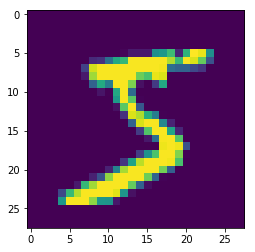

In [2]:
mnist = tf.keras.datasets.mnist
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()
print('Tamanho da lista de treinamento: '+str(len(x_treino)))
print('Tamanho da lista de validação: '+str(len(x_teste)))
plt.imshow(x_treino[0])
plt.show()

OBS.: Todas as imagens aqui têm dimensões 28x28.

A lista `y_treino` armazena o rótulo de cada dado em `x_treino`. O mesmo ocorre nas listas de teste.

In [3]:
print('Rótulo da imagem acima (x_treino[0]): '+str(y_treino[0]))

Rótulo da imagem acima (x_treino[0]): 5


## Pré-processamento
Em nosso conjunto de dados, todas imagens monocromáticas usam valores no intervalo $[0, 255] \in Z$ para representar as 256 tons de uma cor. Vamos normalizar esses valores para $[0,1] \in R$.

In [4]:
x_treino = tf.keras.utils.normalize(x_treino, axis=1)
x_teste = tf.keras.utils.normalize(x_teste, axis=1)

Para demonstrar que a imagem permanece igual, vamos imprimi-la. Com a adição de um novo argumento no `imshow()`, veremos ela em escala de cinza.

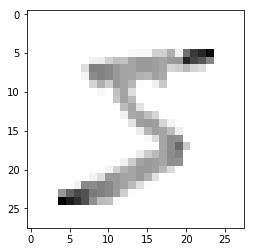

In [5]:
plt.imshow(x_treino[0], cmap=plt.cm.binary)
plt.show()

## Costruindo o modelo da rede neural
Na biblioteca Keras, as redes são objetos chamados de **modelos**. O modelo que queremos construir é a [Multi-Layer Perceptron](https://juliocprocha.files.wordpress.com/2017/11/imagem_1.jpg) tradicional, que no código é denominada `Sequential()`. Logo temos:

In [6]:
model = tf.keras.models.Sequential()

Vamos criar uma camada com a função `add()`. Geralmente na primeira chamada do `add` estamos definindo a primeira camada oculta, mas neste caso iremos usá-lo para tratar os dados de entrada. O `Flatten()` irá configurar a rede para ao receber uma imagem transformá-lo num vetor unidimencional com quantas posições forem necessárias. Por isso, não há necessidade de especificar nada sobre quantidade, função ativadora, etc.

O que faremos por agora é "alertar" ao modelo que a entrada deve ser transformada numa lista unidimencional. A matriz 28x28 será redimensionada para um vetor 1x784.

In [7]:
model.add(tf.keras.layers.Flatten())

Criando primeira camada oculta com 128 neurônios com função de ativação `ReLU()`. 
$$
ReLU(x) = max(0, x)
$$

In [8]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

Última camada terá 10 neurônios, cada um representando um dos 10 algarismos arábicos.

A próxima função de ativação é bem comum na última camada de redes neurais que envolvem classificação entre conjuntos disjuntos.

In [9]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

Usar a **Softmax** como função de ativação faz com que os valores resultantes em cada neurônio seja na verdade a probabilidade da entrada pertencer a classe que ele representa. Sendo assim, todos os neurônios de saída retornam valores em $[0,1]$ e a soma entre todos é 1.

$$
\sigma(z)_j = \dfrac{e^{z_ j}}{\sum_{k=1}^{K}e^{z_ k}}
$$
$z$ é o valor no neurônio antes da ativação

$j$ é o índice do neurônio de saída

$k$ é o índice de todos os neurônios em um nível

Construção completa.

## Compilando e treinando a rede
O último passo é "compilar" a rede, segundo o linguajar da biblioteca. Na prática isso significa passar as configurações de como será o treinamento e a otimização. 

De acordo com a [documentação](https://keras.io/models/model/) da função `compile()`, podemos fornecer os parâmetros: 
* [Optimizer](https://faroit.github.io/keras-docs/0.2.0/optimizers/): Define os vários parâmetros presentes em redes neurais. Exemplos: taxa de aprendizagem e termo momento
* [Loss](https://keras.io/losses/): Função custo usada para calcular novos pesos
* [Metrics](https://keras.io/metrics/): Função que julga a performance da rede
* Loss_weights
* Sample_weight_mode
* Weighted_metrics
* Target_tensors

Só nos interessam os 3 primeiros. Nos links acima pode-se consultar a documentação de tudo isso.

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

O método `fit()` é o último passo para treinar. Nela, passamos as entradas da rede neural e seus respectivos rótulos. Baseando-se neste conjunto de entradas, os pesos serão calculados para minimizar o erro em relação às respostas em `y_treino`.

In [11]:
H = model.fit(x_treino, y_treino, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 13s 221us/step - loss: 0.3111 - acc: 0.9131
Epoch 2/3
60000/60000 [==============================] - 13s 213us/step - loss: 0.1404 - acc: 0.9584
Epoch 3/3
60000/60000 [==============================] - 13s 216us/step - loss: 0.0965 - acc: 0.9711


## Avaliando desempenho

Usaremos as 10.000 amostras destinadas a validação guardadas em `x_teste`. Para sabermos se a rede aprendeu mesmo ou se memorizou o treinamento. é importante não usar amostrar usadas no treinamento.

Faremos isso usando a função `evaluate()` da classe `Model`. Ela retorna dois escalares: um que representa a perda; o outro, precisão.

In [12]:
val_perd, val_prec = model.evaluate(x_teste, y_teste)
print('Perda: {:2.2f}%'.format(val_perd*100))
print('Precisão: {:2.2f}%'.format(val_prec*100)+' das amostras foram rotulados corretamente.')

10000/10000 [==============================] - 1s 84us/step
Perda: 10.37%
Precisão: 96.79% das amostras foram rotulados corretamente.


## Histórico do custo

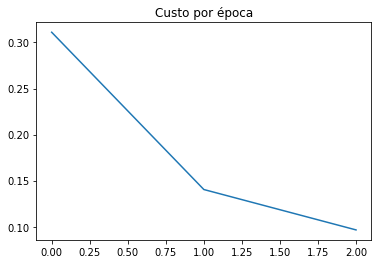

In [13]:
plt.plot(H.history['loss'])
plt.title('Custo por época')
plt.show()

## Matriz de confusão
Precisaremos da função `predict()` para construir a matriz de confusão. Ela recebe uma amostra, imagem no caso, e retorna o rótulo calculado pela rede neural. Usaremos a versão que opera sob um array inteiro e retorna o array de resposta.

A matriz $C$ resultante é uma 10x10. Na qual o elemento $c_{ij}$ corresponde a quantidade de vezes que o número i foi classificado como j. O elemento $c_{12}$ guarda quantas vezes o algarismo 1 foi classificado como 2. Por isso, o ideal seria uma matriz com valores nulos em todas as posições fora da diagonal principal.

In [14]:
rotulos = model.predict_classes(x_teste)
confusao = np.zeros((10,10))  # Inicializa matriz de zeros

for i in range(len(rotulos)):  # Realiza contagem
    confusao[rotulos[i]][y_teste[i]] += 1



O código abaixo é necessário para exibir a matriz com o mapeamento de cor e os valores em cada elemento.

Matriz de confusão sem normalização
[[ 966    0    1    1    0    1    6    0    1    4]
 [   0 1117    4    0    0    1    3    2    8    0]
 [   7    0  997    7    0    1    3    5   12    0]
 [   0    0   10  965    0   11    0    5    8   11]
 [   1    0    5    2  937    0    5    4    3   25]
 [   5    0    1   13    0  858    5    0    6    4]
 [   6    3    2    1    5    7  931    0    3    0]
 [   1    3   12    4    3    0    0  995    1    9]
 [   5    2    5    5    5    4    3    4  932    9]
 [   2    5    0    4    7    2    1    5    2  981]]


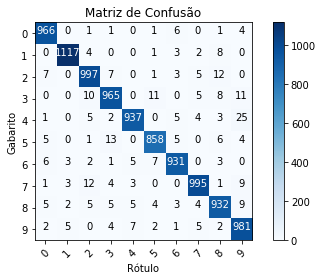

In [15]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confução normalizada")
    else:
        print('Matriz de confusão sem normalização')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Gabarito')
    plt.xlabel('Rótulo')
    plt.tight_layout()


cm = confusion_matrix(y_teste, rotulos)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, ['0', '1', '2','3','4','5','6','7','8','9'])
plt.show()